# SALES OF A SUPERMARKET

### i) IMPORTING NECESSARY LIBRARIES

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('supermarket_sales.csv') 

In [42]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### ii) DATA CLEANING

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [44]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### Conclusion - There's no null value present in this dataset

In [45]:
#Standardize Categorical Data - Ensure consistency in categorical values (e.g., avoid "Male" and "male").
df['Gender'] = df['Gender'].str.capitalize()
df['Customer type'] = df['Customer type'].str.capitalize()
df['City'] = df['City'].str.strip()  # Remove leading/trailing spaces

In [46]:
print(df.dtypes)  #To check the datatype of the dataset

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [47]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### iii) Generating Descriptive Statistics

In [48]:
# Average unit prize
avg_unit_price = df['Unit price'].mean()
print(f"Average Unit Price: {avg_unit_price:.2f}")

Average Unit Price: 55.67


In [49]:
# Total Sales Per Branch
total_sales_branch = df.groupby('Branch')['Total'].sum()
print("Total Sales Per Branch:")
print(total_sales_branch)

Total Sales Per Branch:
Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [50]:
# Average Rating Per Product Line
avg_rating_product_line = df.groupby('Product line')['Rating'].mean()
print("Average Rating Per Product Line:")
print(avg_rating_product_line)

Average Rating Per Product Line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


In [51]:
# Total Quantity Sold Per City
total_quantity_city = df.groupby('City')['Quantity'].sum()
print("Total Quantity Sold Per City:")
print(total_quantity_city)

Total Quantity Sold Per City:
City
Mandalay     1820
Naypyitaw    1831
Yangon       1859
Name: Quantity, dtype: int64


In [52]:
# Top Payment Method
top_payment_method = df['Payment'].value_counts().idxmax()
print(f"Top Payment Method: {top_payment_method}")

Top Payment Method: Ewallet


In [53]:
# Gross Income Per Branch:
gross_income_branch = df.groupby('Branch')['gross income'].sum()
print("Gross Income Per Branch:")
print(gross_income_branch)

Gross Income Per Branch:
Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


In [54]:
# Average Sales by Customer Type:
avg_sales_customer_type = df.groupby('Customer type')['Total'].mean()
print("Average Sales by Customer Type:")
print(avg_sales_customer_type)

Average Sales by Customer Type:
Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


In [55]:
# Most Popular Product Line:
popular_product_line = df['Product line'].value_counts().idxmax()
print(f"Most Popular Product Line: {popular_product_line}")

Most Popular Product Line: Fashion accessories


## iii) Exploratory Data Analysis (EDA)

#### Bar plot to show which branch has the highest sales records.

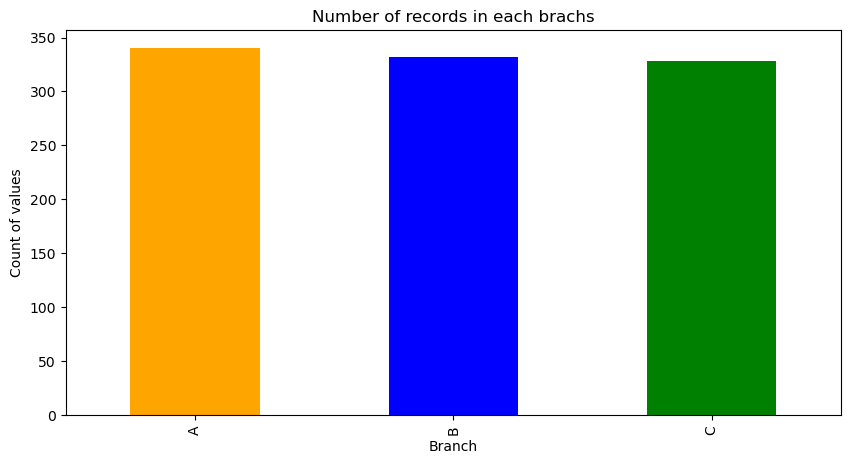

In [56]:
df['Branch'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(10,5),color=['orange','blue','green'])
plt.title('Number of records in each brachs')
plt.xlabel('Branch')
plt.ylabel('Count of values')
plt.show()

#### Pie chart to visualize the gender distribution in the data.

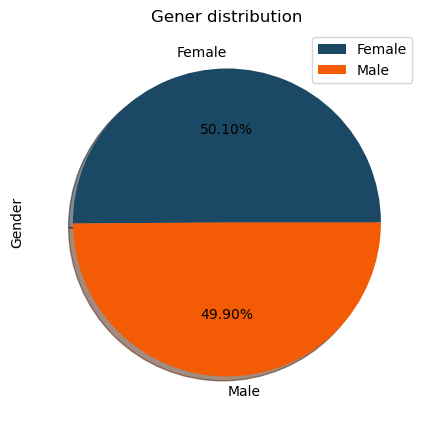

In [57]:
df['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(10,5),labels=['Female','Male'], colors=['#1b4965','#f35b04'], autopct='%1.2f%%', shadow=True)
plt.title('Gener distribution')
plt.legend()
plt.show()

#### Trends Analysis: Ploting total sales by month and branch.

In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

In [59]:
# Aggregating sales data by Month and Branch
sales_trends = df.groupby(['Month', 'Branch'])['Total'].sum().reset_index()
# Converting 'Month' to datetime format for plotting
sales_trends['Month'] = sales_trends['Month'].dt.to_timestamp()

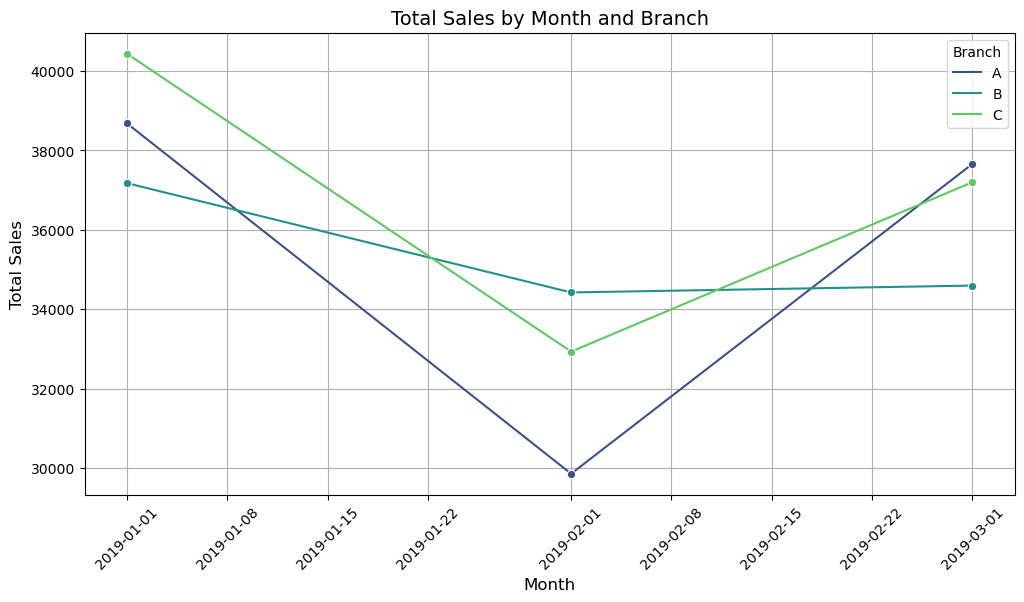

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Month', y='Total', hue='Branch', marker='o', palette='viridis')
plt.title('Total Sales by Month and Branch', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Branch')
plt.grid(True)
plt.show()

'''Conclusion  From the analysis, it is clear that January 1 has the highest sales compared to all other days in the dataset. This could be due to: 
New Year's Celebrations: People might be shopping for celebrations, gifts, or other holiday-related needs on this day.
Special Offers: Businesses might run New Year discounts or promotions, leading to higher sales.
Increased Customer Activity: Many people shop more during holidays, which could explain the spike in sales.
This shows how important New Year’s Day is for businesses. Companies can take advantage of this trend by planning special campaigns or offers to boost sales during similar occasions.'''

#### Total Quantity Sold by Product Category

In [61]:
quantity_by_category = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print(quantity_by_category)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


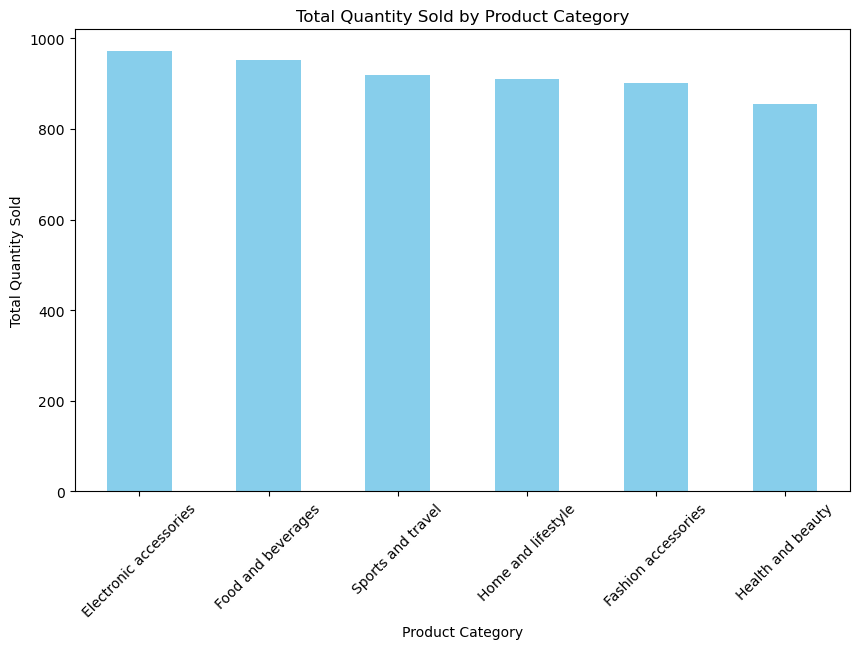

In [62]:
#Plotting Quantity Sold by Product Category
plt.figure(figsize=(10, 6))
quantity_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

#### Total Revenue by Product Category

In [63]:
revenue_by_category = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
print(revenue_by_category)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


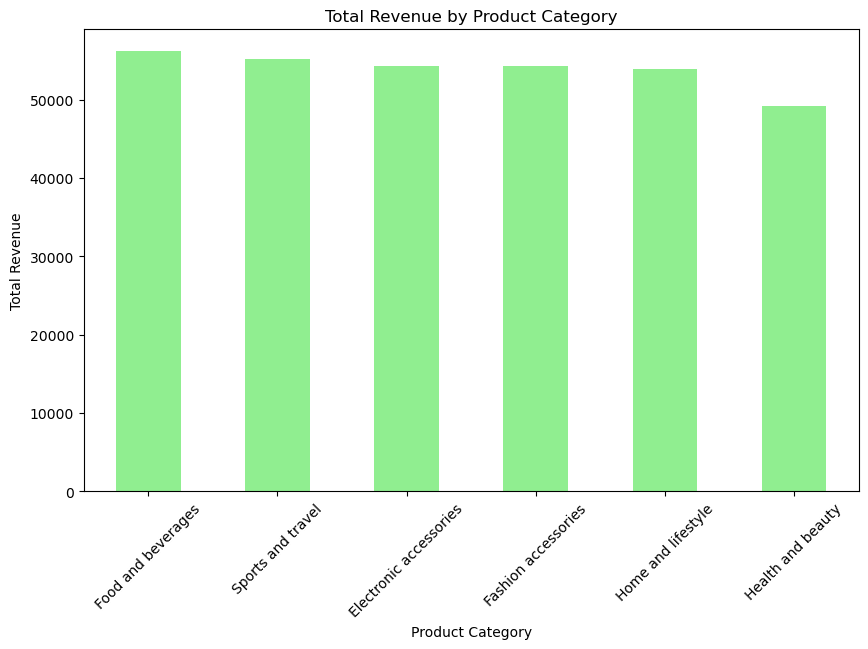

In [64]:
# Plotting Revenue by Product Category
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Group by Branch and Payment method to calculate the count of each payment method per branch
payment_method_analysis = df.groupby(['Branch', 'Payment']).size().unstack().fillna(0)
print(payment_method_analysis)

Payment  Cash  Credit card  Ewallet
Branch                             
A         110          104      126
B         110          109      113
C         124           98      106


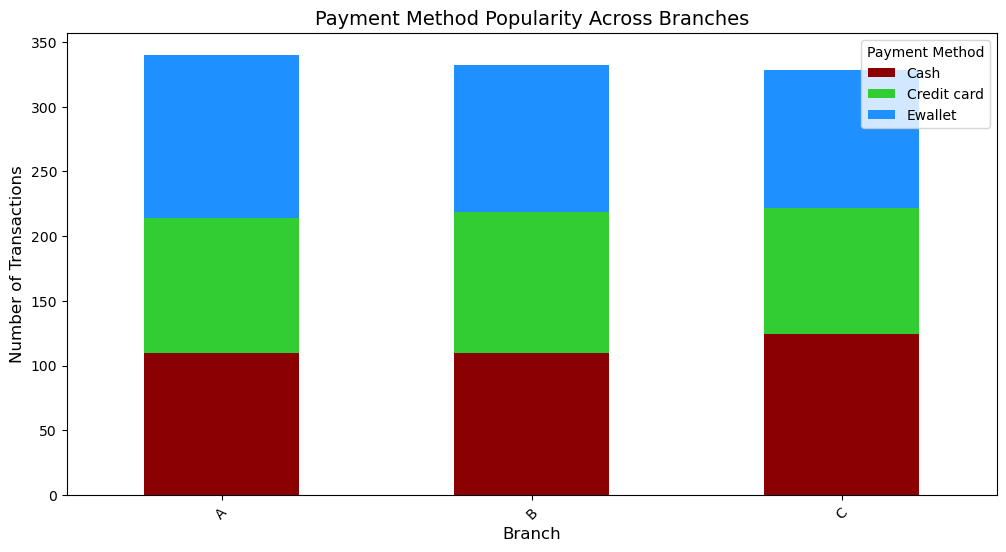

In [66]:
payment_method_analysis.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#8B0000', '#32CD32', '#1E90FF', '#FFD700'])
plt.title('Payment Method Popularity Across Branches', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()

In [67]:
payment_method_percentage = payment_method_analysis.div(payment_method_analysis.sum(axis=1), axis=0) * 100
print(payment_method_percentage)

Payment       Cash  Credit card    Ewallet
Branch                                    
A        32.352941    30.588235  37.058824
B        33.132530    32.831325  34.036145
C        37.804878    29.878049  32.317073


## iv) Basic Predictive Modeling

### Converting categorical data 

In [68]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Product line', 'Branch', 'Payment', 'City', 'Customer type', 'Gender'], drop_first=True)

In [69]:
# Define features (X) and target variable (y)
X = df_encoded[['Unit price', 'Quantity'] + list(df_encoded.columns[df_encoded.columns.str.contains('Product line|Branch|City|Customer type|Gender')])]
y = df_encoded['Total']

In [70]:
from sklearn.model_selection import train_test_split
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression   #Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [72]:
from sklearn.tree import DecisionTreeRegressor             #Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluating the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression Model - MAE: {mae_lr}")
print(f"Linear Regression Model - MSE: {mse_lr}")
print(f"Linear Regression Model - R-squared: {r2_lr}")

Linear Regression Model - MAE: 59.49407017761243
Linear Regression Model - MSE: 6380.157253434053
Linear Regression Model - R-squared: 0.9019327590072033


In [74]:
# Evaluating the Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Model - MAE: {mae_dt}")
print(f"Decision Tree Model - MSE: {mse_dt}")
print(f"Decision Tree Model - R-squared: {r2_dt}")

Decision Tree Model - MAE: 7.51002
Decision Tree Model - MSE: 133.07627135249996
Decision Tree Model - R-squared: 0.9979545296056576


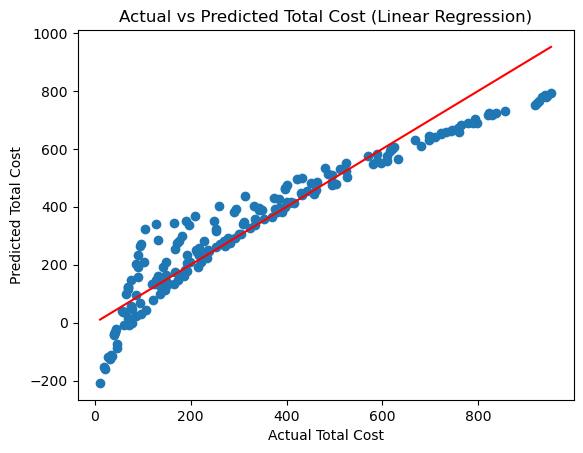

In [75]:
import matplotlib.pyplot as plt
# Plotting Actual vs Predicted values for Linear Regression
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual Total Cost')
plt.ylabel('Predicted Total Cost')
plt.title('Actual vs Predicted Total Cost (Linear Regression)')
plt.show()

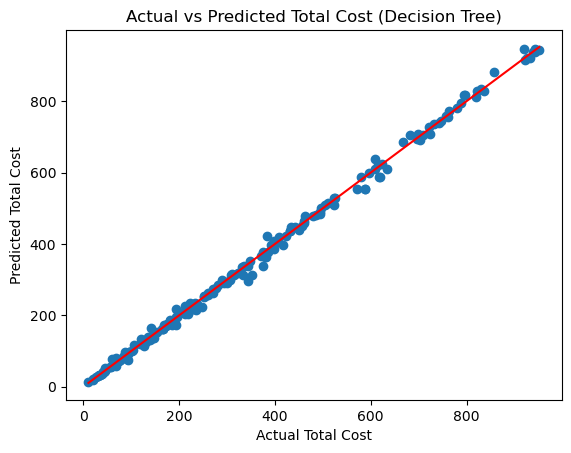

In [76]:
# Plotting Actual vs Predicted values for Decision Tree
plt.scatter(y_test, y_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual Total Cost')
plt.ylabel('Predicted Total Cost')
plt.title('Actual vs Predicted Total Cost (Decision Tree)')
plt.show()

In [77]:
'''Conclusion - Decision tree is more relable than the linear regression in this case'''

'Conclusion - Decision tree is more relable than the linear regression in this case'

# INSIGHTS

In [78]:
'''Key Insight: Electronic Accessories as the Top-Selling Product Line
The data indicates that Electronic Accessories is the highest-performing product line, with 971 units sold, making it a significant revenue driver for the business. This highlights its strong demand among customers.'''

'Key Insight: Electronic Accessories as the Top-Selling Product Line\nPopularity of Electronic Accessories: The data indicates that Electronic Accessories is the highest-performing product line, with 971 units sold, making it a significant revenue driver for the business. This highlights its strong demand among customers.'

In [79]:
'''Encourage Digital Payment Adoption: Given that cash is a dominant payment method, businesses can introduce incentives for customers who opt for digital payments (such as credit cards or mobile wallets). Offering a 5-10% discount or cashback on digital payments could motivate customers to use them more frequently. This will not only streamline payment processing but could also help businesses in managing cash flows and reducing the risk of cash handling.'''

'Encourage Digital Payment Adoption: Given that cash is a dominant payment method, businesses can introduce incentives for customers who opt for digital payments (such as credit cards or mobile wallets). Offering a 5-10% discount or cashback on digital payments could motivate customers to use them more frequently. This will not only streamline payment processing but could also help businesses in managing cash flows and reducing the risk of cash handling.'

In [80]:
'''Seasonal Promotions: The seasonal trends (e.g., higher sales in January) suggest that customers may be more likely to shop during certain months, potentially due to events, holidays, or sales seasons. Businesses can plan seasonal campaigns around these high-sales months. For example, launching exclusive discounts or limited-time offers in January could align with the spike in sales, potentially boosting revenue further.'''

'Seasonal Promotions: The seasonal trends (e.g., higher sales in January) suggest that customers may be more likely to shop during certain months, potentially due to events, holidays, or sales seasons. Businesses can plan seasonal campaigns around these high-sales months. For example, launching exclusive discounts or limited-time offers in January could align with the spike in sales, potentially boosting revenue further.'